In [55]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
datasets = pd.read_csv('D:/diploma AI/advanced_machine_learning_course_Amit/Dicision_Tree/Social_Network_Ads.csv')

In [56]:
datasets.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [57]:
datasets.notnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
395,True,True,True,True,True
396,True,True,True,True,True
397,True,True,True,True,True
398,True,True,True,True,True


In [58]:
x = datasets.iloc[:,[2,3]].values
y = datasets.iloc[:,4].values


In [59]:
from sklearn.model_selection import train_test_split
x_Train, x_Test, y_train, y_Test = train_test_split(x, y, test_size = 0.3,random_state=42)


In [60]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_Train = sc_x.fit_transform(x_Train)
x_Test = sc_x.transform(x_Test)


In [61]:
from sklearn.linear_model import LogisticRegression

# Create the classifier
classifier = LogisticRegression(random_state=42)
# Reshape y_Train to 1D without using ravel
y_Train = y_train.reshape(-1)

# Correct fit call
classifier.fit(x_Train, y_Train)

# Correct the fit call


LogisticRegression(random_state=42)

In [62]:
y_perd = classifier.predict(x_Test)


In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_curve
cm = confusion_matrix(y_Test, y_perd)

In [64]:
cm

array([[71,  2],
       [16, 31]])

In [65]:
accuracy_score_ = accuracy_score(y_Test, y_perd)
recall_score_ = recall_score(y_Test, y_perd)
precision_score_ = precision_score(y_Test,y_perd)
f1_score_ = f1_score(y_Test, y_perd)
print("accuracy_score: ",accuracy_score_)
print("recall_score: ",recall_score_)
print("precision_score: ",precision_score_)
print("f1_score: ",f1_score_)



accuracy_score:  0.85
recall_score:  0.6595744680851063
precision_score:  0.9393939393939394
f1_score:  0.775


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10340\1962865570.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j,1],


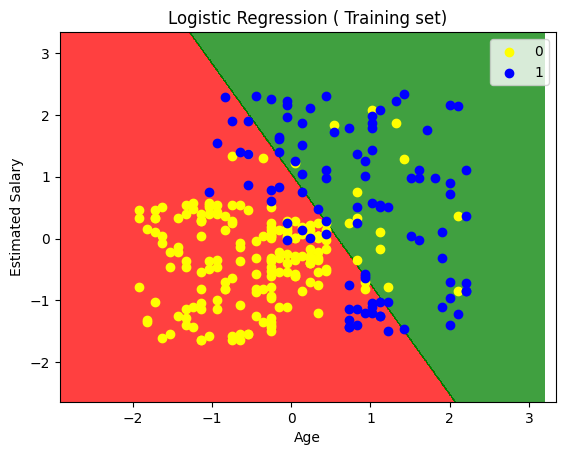

In [66]:
# Visualising the Training set results 

from matplotlib.colors import ListedColormap
X_Set, Y_Set = x_Train, y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:,0].min() -1, stop = X_Set[:, 0].max() +1, step = 0.01),
                     np.arange(start = X_Set[:,1].min() -1, stop = X_Set[:, 1].max() +1, step = 0.01))


plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X2.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j,1],
                c = ListedColormap(('yellow', 'blue'))(i), label = j)
plt.title('Logistic Regression ( Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()